### 方法1: 由`列表(数组)`创建

In [3]:
"""
^ 指定显式索引为字符串的series
"""
pd.Series([83, 68], index=["bob", "alice"], name="weights")

'\n^ 指定显式索引为字符串的series\n'

bob      83
alice    68
Name: weights, dtype: int64

In [4]:
"""
^ 指定显式索引为数字的series
"""
pd.Series([3, 4, 5], index=[100, 200, 300])  # * data可以是一个数（标量），这时会重复到每个索引

'\n^ 指定显式索引为数字的series\n'

100    3
200    4
300    5
dtype: int64

### 方法2: 由`字典`创建

In [5]:
pd.Series({2:'a', 1:'b', 3:'c'})  # * index与字典键一致

2    a
1    b
3    c
dtype: object

In [6]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[1, 3])  # ! 可以通过指定索引的方式筛选需要的结果

1    b
3    c
dtype: object

## 1.2 索引与切片


### 1.2.1 显式与隐式索引  
Series可以看成是可以自定义索引的数组

In [7]:
ls = [0.25, 0.5, 0.75, 1.0]

ar = np.array(ls)
ar  # * 创建一个numpy数组
ar[0] # ^ 回顾numpy数组通过`隐式索引`来获取数值

data = pd.Series(ls)
data  # * 转换成Series
data[0]  # ^ Series用显式定义的索引与数值关联，默认是整数索引

data = pd.Series(ls, index=['a', 'b', 'c', 'd'])  # ^ Series的索引可以自定义
data
data['c']
data[2]

array([0.25, 0.5 , 0.75, 1.  ])

0.25

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

0.25

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

0.75

0.75

### 1.2.2 index筛选行

In [8]:
"""
^ 创建示例Series
"""
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

'\n^ 创建示例Series\n'

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

#### 方法1: 双方括号指定index

In [9]:
data[['a', 'c']]  # * 双方括号指定索引（花哨的索引）

a    0.25
c    0.75
dtype: float64

#### 方法2: bool数组筛选

In [10]:
data > 0.3  # * 返回满足条件的bool数组
data < 0.8
(data > 0.3) & (data < 0.8)  # * bool数组的集合运算
data[(data > 0.3) & (data < 0.8)]  # * 使用bool筛选数据

a    False
b     True
c     True
d     True
dtype: bool

a     True
b     True
c     True
d    False
dtype: bool

a    False
b     True
c     True
d    False
dtype: bool

b    0.50
c    0.75
dtype: float64

#### 方法3: loc/iloc属性
* 如果显式索引正好是整数，这样就会与默认的隐式整数索引混淆
* `为了避免造成混乱，pandas提供了索引器进行索引`

In [11]:
"""
^ 创建示例Series
"""
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])

'\n^ 创建示例Series\n'

##### 对显式index索引: loc属性

In [12]:
data
data.loc[1]
data.loc[1:4]

1    a
3    b
5    c
dtype: object

'a'

1    a
3    b
dtype: object

##### 对隐式index索引: iloc属性
`从0开始，左闭右开`

In [13]:
data
data.iloc[0]
data.iloc[0:2]

1    a
3    b
5    c
dtype: object

'a'

1    a
3    b
dtype: object

### 1.2.3 切片  

In [14]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data
data['a':'c']  # * 利用显式索引切片
data[0:2]  # * 利用整数隐式索引切片
# ! 注意！！显式索引包含最后一个，而隐式索引不包含最后一个
data[['a', 'c']]  # * 双方括号指定索引（花哨的索引）


a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

a    0.25
b    0.50
c    0.75
dtype: float64

a    0.25
b    0.50
dtype: float64

a    0.25
c    0.75
dtype: float64

## 1.3 常用操作

In [15]:
"""
^ 创建示例Series
"""
population_dict = {
    'California': 928465828,
    'Texas': 2634657823,
    'New York': 1962738924,
    'Florida': 19665237,
    'Illinois': 12882135
    }
population_dict # * 创建一个字典

# ^ 将字典转换成series
population_series = pd.Series(population_dict)
population_series

'\n^ 创建示例Series\n'

{'California': 928465828,
 'Texas': 2634657823,
 'New York': 1962738924,
 'Florida': 19665237,
 'Illinois': 12882135}

California     928465828
Texas         2634657823
New York      1962738924
Florida         19665237
Illinois        12882135
dtype: int64

### 查看index: `index`属性

In [16]:
population_series  # * 示例series
population_series.index
list(population_series.index)  # * 返回index的列表

California     928465828
Texas         2634657823
New York      1962738924
Florida         19665237
Illinois        12882135
dtype: int64

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

['California', 'Texas', 'New York', 'Florida', 'Illinois']

### Series转换成数组：`values`属性

In [17]:
# values属性：将Series对象中的数据转成Numpy数组
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)

d = data.values
print(d)
type(d)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
[0.25 0.5  0.75 1.  ]


numpy.ndarray

### Series转换成字典: `items`方法

In [18]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data
dict(data.items())

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

{0: 0.25, 1: 0.5, 2: 0.75, 3: 1.0}

***
# 2.DataFrame基础
* DataFrame是既有行索引又有列名的二维数组
* 也可以看作：拥有共同行索引的多个Series对象的组合

## 2.1 创建DataFrame

### ​方法1: 由`列表(数组)`创建

In [19]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
data  # * 创建一个二维数组
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people.dtypes  # * 输出每列数据的类型
people

[[1985, nan, 'Biking', 68], [1984, 3.0, 'Dancing', 83], [1992, 0, nan, 112]]

birthyear      int64
children     float64
hobby         object
weight         int64
dtype: object

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


### ​方法2: 由`Series`创建

In [20]:
# no.1
population_dict = {
    'California': 928465828,
    'Texas': 2634657823,
    'New York': 1962738924,
    'Florida': 19665237,
    'Illinois': 12882135
    }
population = pd.Series(population_dict)

# ^ 通过Series对象创建
df1 = pd.DataFrame(population, columns=['population'])
df1

,population
California,928465828
Texas,2634657823
New York,1962738924
Florida,19665237
Illinois,12882135


### ​方法3: 由`字典`创建

In [21]:
data = [{'a':i, 'b':2*i} for i in range(3)]
data # * 生成字典data

df2 = pd.DataFrame(data)
df2

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]

,a,b
0,0,0
1,1,2
2,2,4


In [22]:
"""
^ 出现缺失值
"""
pd.DataFrame([{'a':1, 'b':2}, {'b':3, 'c':5}])  # ! 缺失值会用`Not a Number`占位

'\n^ 出现缺失值\n'

,a,b,c
0,1.0,2,NaN
1,NaN,3,5.0


### ​方法4: 由`series的字典`创建

In [23]:
"""
^ 示例1
"""
population_dict = {
    'California': 928465828,
    'Texas': 2634657823,
    'New York': 1962738924,
    'Florida': 19665237,
    'Illinois': 12882135
    }
population = pd.Series(population_dict) # * 创建第一个Series: population

area_dict = {
    'California': 423853,
    'Texas': 6928374,
    'New York': 14184736, 
    'Florida': 1702844, 
    'Illinois': 1599923764
}
area = pd.Series(area_dict)  # * 创建第二个Series: aera

print(type(population))
print(type(area))
states = pd.DataFrame({'population':population, 'area':area})  # * 创建df
states
type(states['area'])
"""
Dataframe是特殊的字典  
    普通的字典: 一个key映射到一个value  
    Dataframe: 一个列名映射到一列数据(Series对象)
"""

'\n^ 示例1\n'

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,population,area
California,928465828,423853
Texas,2634657823,6928374
New York,1962738924,14184736
Florida,19665237,1702844
Illinois,12882135,1599923764


pandas.core.series.Series

'\nDataframe是特殊的字典  \n    普通的字典: 一个key映射到一个value  \n    Dataframe: 一个列名映射到一列数据(Series对象)\n'

In [24]:
"""
^ 示例2
"""
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}  # * 创建一个series的字典

people = pd.DataFrame(people_dict)
people
# ! 生成的Df会自动根据Series的索引对齐，缺失值将用NaN补齐
# ! Series的名字将自动忽略


'\n^ 示例2\n'

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


### 逆操作: DataFrame转换成数组: values属性

In [25]:
people
people.values

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


array([[68, 1985, nan, 'Biking'],
       [83, 1984, 3.0, 'Dancing'],
       [112, 1992, 0.0, nan]], dtype=object)

## 2.2 index操作

In [26]:
"""
^ 生成一个试验的states
"""
population_dict = {
    'California': 928465828,
    'Texas': 2634657823,
    'New York': 1962738924,
    'Florida': 19665237,
    'Illinois': 12882135
    }
population = pd.Series(population_dict)

area_dict = {
    'California': 423853,
    'Texas': 6928374,
    'New York': 14184736, 
    'Florida': 1702844, 
    'Illinois': 1599923764
}
area = pd.Series(area_dict)

# * 给上面两个Series赋予列名，生成dataframe
states = pd.DataFrame({'area': area, 'population': population})
states

'\n^ 生成一个试验的states\n'

,area,population
California,423853,928465828
Texas,6928374,2634657823
New York,14184736,1962738924
Florida,1702844,19665237
Illinois,1599923764,12882135


### ​2.2.1 查看index: `index`属性

In [27]:
states.index  # * 查看行索引

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

### 2.2.2 重置index: `reset_index`方法

In [28]:
df1 = pd.DataFrame([[1, 2], [3, 4]])
df2 = pd.DataFrame([[1, 2], [3, 4]])
df = pd.concat([df1, df2])
df # * 合并df后索引保持原样，经常需要重置索引

df = df.reset_index(drop=True)
df

,0,1
0,1,2
1,3,4
0,1,2
1,3,4


,0,1
0,1,2
1,3,4
2,1,2
3,3,4


## 2.3 列操作

### 2.3.1 查看columns: columns属性

In [29]:
states.columns  # ^ 查看列名
states.columns.values  # ^ 如果显示不全，使用此用法

Index(['area', 'population'], dtype='object')

array(['area', 'population'], dtype=object)

### 2.3.2 修改columns: rename方法或直接赋值

In [30]:
a = pd.DataFrame({'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]})
a
# ^ 方法1: rename方法
a.rename(columns={
    'A': 'a', 
    'B': 'b', 
    'C': 'c'
}, inplace=True)
a
# ^ 方法2: 直接赋值改全部
a.columns = ['A', 'B', 'C']
a

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


### 2.3.3 添加columns

#### 方法1: 直接赋值

In [31]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )

people
people['age'] = 2022 - people["birthyear"] # * 添加新列
people['over 30'] = people["age"] > 35 # * 添加一个布尔列
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people
# ! series中缺失的index则用NaN，多出来的则自动忽略

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


,birthyear,children,hobby,weight,age,over 30,pets
alice,1985,NaN,Biking,68,37,True,NaN
bob,1984,3.0,Dancing,83,38,True,0.0
charles,1992,0.0,NaN,112,30,False,5.0


#### 方法2: 指定位置插入列: insert方法

In [32]:
people
people.insert(1, "height", [172, 181, 185])
people

,birthyear,children,hobby,weight,age,over 30,pets
alice,1985,NaN,Biking,68,37,True,NaN
bob,1984,3.0,Dancing,83,38,True,0.0
charles,1992,0.0,NaN,112,30,False,5.0


,birthyear,height,children,hobby,weight,age,over 30,pets
alice,1985,172,NaN,Biking,68,37,True,NaN
bob,1984,181,3.0,Dancing,83,38,True,0.0
charles,1992,185,0.0,NaN,112,30,False,5.0


#### 方法3: 添加列并创建新的副本: assign方法

In [33]:
people
people_new = people.assign(
    body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2, 
    overweight = lambda df: df["body_mass_index"] > 25
)
people_new
people

,birthyear,height,children,hobby,weight,age,over 30,pets
alice,1985,172,NaN,Biking,68,37,True,NaN
bob,1984,181,3.0,Dancing,83,38,True,0.0
charles,1992,185,0.0,NaN,112,30,False,5.0


,birthyear,height,children,hobby,weight,age,over 30,pets,body_mass_index,overweight
alice,1985,172,NaN,Biking,68,37,True,NaN,22.985398,False
bob,1984,181,3.0,Dancing,83,38,True,0.0,25.335002,True
charles,1992,185,0.0,NaN,112,30,False,5.0,32.724617,True


,birthyear,height,children,hobby,weight,age,over 30,pets
alice,1985,172,NaN,Biking,68,37,True,NaN
bob,1984,181,3.0,Dancing,83,38,True,0.0
charles,1992,185,0.0,NaN,112,30,False,5.0


#### 方法4: 计算表达式并替换: eval方法

In [34]:
people.eval("body_mass_index = weight / (height/100) ** 2")  # * 默认inplace=False
people

people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

# ^ 使用@引用变量
overweight_threshold = 30 
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,birthyear,height,children,hobby,weight,age,over 30,pets,body_mass_index
alice,1985,172,NaN,Biking,68,37,True,NaN,22.985398
bob,1984,181,3.0,Dancing,83,38,True,0.0,25.335002
charles,1992,185,0.0,NaN,112,30,False,5.0,32.724617


,birthyear,height,children,hobby,weight,age,over 30,pets
alice,1985,172,NaN,Biking,68,37,True,NaN
bob,1984,181,3.0,Dancing,83,38,True,0.0
charles,1992,185,0.0,NaN,112,30,False,5.0


,birthyear,height,children,hobby,weight,age,over 30,pets,body_mass_index
alice,1985,172,NaN,Biking,68,37,True,NaN,22.985398
bob,1984,181,3.0,Dancing,83,38,True,0.0,25.335002
charles,1992,185,0.0,NaN,112,30,False,5.0,32.724617


,birthyear,height,children,hobby,weight,age,over 30,pets,body_mass_index,overweight
alice,1985,172,NaN,Biking,68,37,True,NaN,22.985398,False
bob,1984,181,3.0,Dancing,83,38,True,0.0,25.335002,False
charles,1992,185,0.0,NaN,112,30,False,5.0,32.724617,True


### 2.3.4 移除columns: pop函数  

In [35]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people

birthyears = people.pop("birthyear")  # * 移除的一列赋值新的变量

birthyears
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

,children,hobby,weight
alice,NaN,Biking,68
bob,3.0,Dancing,83
charles,0.0,NaN,112


### 2.3.5 删除columns

#### 方法1: del命令

In [36]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people

del people['children']  # * 立即生效
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


,birthyear,hobby,weight
alice,1985,Biking,68
bob,1984,Dancing,83
charles,1992,NaN,112


#### 方法2: drop方法

In [37]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people
people.drop(columns=['hobby', 'weight'])

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


,birthyear,children
alice,1985,NaN
bob,1984,3.0
charles,1992,0.0


## 2.4 排序: sort_index/values方法
* 默认升序
* 默认按行排序

In [38]:
"""
^ 示例df
"""
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people['age'] = 2022 - people["birthyear"] # * 添加新列
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

'\n^ 示例df\n'

,birthyear,children,hobby,weight,age,pets
alice,1985,NaN,Biking,68,37,NaN
bob,1984,3.0,Dancing,83,38,0.0
charles,1992,0.0,NaN,112,30,5.0


### 2.4.1 按index排序

In [39]:
people.sort_index(ascending=False) # * 降序排列，默认升序

,birthyear,children,hobby,weight,age,pets
charles,1992,0.0,NaN,112,30,5.0
bob,1984,3.0,Dancing,83,38,0.0
alice,1985,NaN,Biking,68,37,NaN


### 2.4.2 按columns排序

In [40]:
people
people.sort_index(axis=1, inplace=True)
people

,birthyear,children,hobby,weight,age,pets
alice,1985,NaN,Biking,68,37,NaN
bob,1984,3.0,Dancing,83,38,0.0
charles,1992,0.0,NaN,112,30,5.0


,age,birthyear,children,hobby,pets,weight
alice,37,1985,NaN,Biking,NaN,68
bob,38,1984,3.0,Dancing,0.0,83
charles,30,1992,0.0,NaN,5.0,112


### 2.4.3 按某一列的数值排序

In [41]:
people.sort_values(by='age', ascending=False)

,age,birthyear,children,hobby,pets,weight
bob,38,1984,3.0,Dancing,0.0,83
alice,37,1985,NaN,Biking,NaN,68
charles,30,1992,0.0,NaN,5.0,112


---
# 3.Index对象

## 3.1 创建Index对象
* Index对象的很多操作都像数组
* 但是不能通过索引赋值

In [42]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [43]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [44]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [45]:
# ind[0] = 1  # ! Index对象的索引是不可变的，这个设计的目的是避免因修改索引时的粗心大意而导致错误

## 3.2 index对象的集合运算
* Index对象可实现集合的运算

In [46]:
indA = pd.Index([1, 3, 5, 7, 9])  # * 创建indexA
indB = pd.Index([2, 3, 5, 7, 11])  # * 创建indexB

indA & indB  # * 交集
indA | indB  # * 并集
indA ^ indB  # * 异或 = 并集 - 交集

/var/folders/fz/b935cghx795_zycx9njnpf3m0000gn/T/ipykernel_3672/94529917.py:4: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  indA & indB  # * 交集


Int64Index([3, 5, 7], dtype='int64')

/var/folders/fz/b935cghx795_zycx9njnpf3m0000gn/T/ipykernel_3672/94529917.py:5: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indA | indB  # * 并集


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

/var/folders/fz/b935cghx795_zycx9njnpf3m0000gn/T/ipykernel_3672/94529917.py:6: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  indA ^ indB  # * 异或 = 并集 - 交集


Int64Index([1, 2, 9, 11], dtype='int64')

---
# 4.多级索引的DataFrame  
* 行索引和列索引都可以创建成多级索引
* 只需将集合中的键值对的键写成元组的形式

## 4.1 创建多级索引的DataFrame

In [47]:
df = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
df
df["public"]
df["public", "birthyear"]

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

Paris   alice      1985
        bob        1984
London  charles    1992
Name: (public, birthyear), dtype: int64

## 4.2 删除多级索引中的某一级: `droplevel`方法

In [48]:
# * 多索引DF的dropping a level
d1 = df.copy()
d1.columns = d1.columns.droplevel(level=0) # * 将列索引的0级删去
d1.index = d1.index.droplevel(level=1) # * 将行索引的1级删去
d1

,birthyear,hobby,weight,children
Paris,1985,Biking,68,NaN
Paris,1984,Dancing,83,3.0
London,1992,NaN,112,0.0


## 4.3 行列索引的移动:`stacking/unstacking`方法

In [49]:
df2 = df.T
df2

df3 = df2.stack() # * 将`列索引`的最底层stack到`行索引`的最底层
df3

df4 = df3.unstack() # * 将`行索引`的最底层stack到`列索引`的最底层
df4 # ! 此操作并未还原成原样

# ^ 指定level
df5 = df4.stack(level=0)
df5
df6 = df5.unstack(level=(0, 2))
df6

Paris           London
                    alice      bob charles
public  birthyear    1985     1984    1992
        hobby      Biking  Dancing     NaN
private weight         68       83     112
        children      NaN      3.0     0.0

London    Paris
public  birthyear alice      NaN     1985
                  bob        NaN     1984
                  charles   1992      NaN
        hobby     alice      NaN   Biking
                  bob        NaN  Dancing
private weight    alice      NaN       68
                  bob        NaN       83
                  charles    112      NaN
        children  bob        NaN      3.0
                  charles    0.0      NaN

London                Paris                 
                   alice  bob charles   alice      bob charles
private children     NaN  NaN     0.0     NaN      3.0     NaN
        weight       NaN  NaN     112      68       83     NaN
public  birthyear    NaN  NaN    1992    1985     1984     NaN
        hobby        NaN  NaN     NaN  Biking  Dancing     NaN

alice      bob charles
private children  London     NaN      NaN     0.0
                  Paris      NaN      3.0     NaN
        weight    London     NaN      NaN     112
                  Paris       68       83     NaN
public  birthyear London     NaN      NaN    1992
                  Paris     1985     1984     NaN
        hobby     Paris   Biking  Dancing     NaN

alice                          bob                       charles  \
          private       public         private       public          private   
           London Paris London   Paris  London Paris London    Paris  London   
birthyear     NaN   NaN    NaN    1985     NaN   NaN    NaN     1984     NaN   
children      NaN   NaN    NaN     NaN     NaN   3.0    NaN      NaN     0.0   
hobby         NaN   NaN    NaN  Biking     NaN   NaN    NaN  Dancing     NaN   
weight        NaN    68    NaN     NaN     NaN    83    NaN      NaN     112   

                              
                public        
          Paris London Paris  
birthyear   NaN   1992   NaN  
children    NaN    NaN   NaN  
hobby       NaN    NaN   NaN  
weight      NaN    NaN   NaN

---
# 5.数据筛选

In [50]:
"""
^ 创建示例df
"""
states = pd.DataFrame({'area': area, 'population': population})
states["num"] = [1, 2, 3, 4, 5]
states

'\n^ 创建示例df\n'

,area,population,num
California,423853,928465828,1
Texas,6928374,2634657823,2
New York,14184736,1962738924,3
Florida,1702844,19665237,4
Illinois,1599923764,12882135,5


## 5.1 筛选行

### 方法1: bool数组筛选行

In [51]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )

people
people[np.array([True, False, True])]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
charles,1992,0.0,NaN,112


### 方法2: 条件筛选行

In [52]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )

people
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83


## 5.2 筛选列

In [53]:
"""
^ 对列名进行字典形式的索引
"""
states
states['area']  # * 索引1列
states.area  # * 索引1列
states[["area", "num"]]  # * 双方括号索引多个columns

'\n^ 对列名进行字典形式的索引\n'

,area,population,num
California,423853,928465828,1
Texas,6928374,2634657823,2
New York,14184736,1962738924,3
Florida,1702844,19665237,4
Illinois,1599923764,12882135,5


California        423853
Texas            6928374
New York        14184736
Florida          1702844
Illinois      1599923764
Name: area, dtype: int64

California        423853
Texas            6928374
New York        14184736
Florida          1702844
Illinois      1599923764
Name: area, dtype: int64

,area,num
California,423853,1
Texas,6928374,2
New York,14184736,3
Florida,1702844,4
Illinois,1599923764,5


## 5.3 索引器：`loc/iloc`属性  
* 行列都可以索引
* 格式: 先行后列

### 5.3.1 显式索引器: `loc`属性

In [54]:
states
states.loc['California': 'Florida', 'area': 'population']

,area,population,num
California,423853,928465828,1
Texas,6928374,2634657823,2
New York,14184736,1962738924,3
Florida,1702844,19665237,4
Illinois,1599923764,12882135,5


,area,population
California,423853,928465828
Texas,6928374,2634657823
New York,14184736,1962738924
Florida,1702844,19665237


### 5.3.2 隐式索引器: `iloc`属性

In [55]:
states
states.iloc[:2, :1]

,area,population,num
California,423853,928465828,1
Texas,6928374,2634657823,2
New York,14184736,1962738924,3
Florida,1702844,19665237,4
Illinois,1599923764,12882135,5


,area
California,423853
Texas,6928374


### 5.3.3 使用`loc`进行条件筛选

In [56]:
states
states.loc[states.area > 7000000, ['area', 'population']]

,area,population,num
California,423853,928465828,1
Texas,6928374,2634657823,2
New York,14184736,1962738924,3
Florida,1702844,19665237,4
Illinois,1599923764,12882135,5


,area,population
New York,14184736,1962738924
Illinois,1599923764,12882135


## 5.4 数据查询: `query`方法

In [57]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people['age'] = 2022 - people["birthyear"] # * 添加新列
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

people.query("age > 30 and pets == 0")

,birthyear,children,hobby,weight,age,pets
alice,1985,NaN,Biking,68,37,NaN
bob,1984,3.0,Dancing,83,38,0.0
charles,1992,0.0,NaN,112,30,5.0


,birthyear,children,hobby,weight,age,pets
bob,1984,3.0,Dancing,83,38,0.0


---
# 6.合并数据集

## 6.1 连接: concat函数

In [58]:
"""
^ 创建示例df
"""
def make_df(col_names, index):
    ''' # ^ 为了便于示范，创建一个DataFrame生成器 '''
    data = {c: [str(c) + str(i) for i in index] for c in col_names}
    return pd.DataFrame(data, index)

make_df('ABC', range(3))

"""
^ 两个示例df
"""
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_loc
city_pop

'\n^ 创建示例df\n'

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


'\n^ 两个示例df\n'

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


### 6.1.1 连接Series

In [59]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

### 6.1.2 连接DataFrame
* concat函数不重置索引

In [60]:
df1 = make_df('AB', [0, 1])
df2 = make_df('AB', [0, 1])
df3 = make_df('CD', [0, 2])

df1
df2
df3

pd.concat([df1, df2]) # * 连同显式索引直接竖着拼接, 即使索引重复也会保留索引

,A,B
0,A0,B0
1,A1,B1


,A,B
0,A0,B0
1,A1,B1


,C,D
0,C0,D0
2,C2,D2


,A,B
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1


### 6.1.3 横向连接: `axis=1`

In [61]:
pd.concat([df1, df2, df3], axis=1)  # * 横向拼接


,A,B,A,B,C,D
0,A0,B0,A0,B0,C0,D0
1,A1,B1,A1,B1,NaN,NaN
2,NaN,NaN,NaN,NaN,C2,D2


### 6.1.4 重置索引: `ignore_index=True`

In [62]:
# ! 注意到默认的concat没有改变索引，可能会有相同索引的行
pd.concat([df1, df2], ignore_index=True)  # * 重置索引

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


### 6.1.5 连接后只保留交集列: `join="inner"`

In [63]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


## 6.2 合并: merge函数

In [64]:
"""
两个示例df
"""
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_loc
city_pop

'\n两个示例df\n'

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


### 6.2.1 指定共有的一列, 合并两表

In [65]:
pd.merge(left=city_loc, right=city_pop, on="city")
"""
! 注意:
因为两个df都有相同的列名state, 因此输出的df中有state_x和state_y
on参数设置了按"city"并合, 只保留city列有交集的行
"""

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


'\n! 注意:\n因为两个df都有相同的列名state, 因此输出的df中有state_x和state_y\non参数设置了按"city"并合, 只保留city列有交集的行\n'

### 6.2.2 指定保留范围: `how`参数
* 默认取交集

In [66]:
print('pd.merge(left=city_loc, right=city_pop, on="city", how="outer")')
pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
# * 保留两个df所有行

print('pd.merge(left=city_loc, right=city_pop, on="city", how="left")')
pd.merge(left=city_loc, right=city_pop, on="city", how="left")
# * 保留left所有

print('pd.merge(left=city_loc, right=city_pop, on="city", how="right")')
pd.merge(left=city_loc, right=city_pop, on="city", how="right")
# * 保留right所有

pd.merge(left=city_loc, right=city_pop, on="city", how="outer")


,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


pd.merge(left=city_loc, right=city_pop, on="city", how="left")


,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN


pd.merge(left=city_loc, right=city_pop, on="city", how="right")


,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


### 6.2.3 当指定的一列在两表中的名称不同时

In [67]:
city_pop.columns = ["population", "name", "state"]
city_loc
city_pop
pd.merge(left=city_loc, right=city_pop, left_on="city", right_on="name")

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


,population,name,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## 6.3 添加: `append`方法

In [68]:
city_loc
city_pop
city_loc.append(city_pop)

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


,population,name,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


,state,city,lat,lng,population,name
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
3,California,NaN,NaN,NaN,808976.0,San Francisco
4,New-York,NaN,NaN,NaN,8363710.0,New York
5,Florida,NaN,NaN,NaN,413201.0,Miami
6,Texas,NaN,NaN,NaN,2242193.0,Houston


---
# 7.缺失值处理  
[参考网址](https://blog.csdn.net/xiaoxiaosuwy/article/details/81187694)

In [69]:
"""
^ 构造一个有缺失值的df, 作为示例
"""
df_1 = pd.DataFrame([[0, 1], [1, 2]], columns=['col1', 'col2'])
df_2 = pd.DataFrame([[0, 1, 2], [1, 2, 3]], columns=['col1', 'col2', 'col3'])
df = pd.concat([df_1, df_2])  # * 构造出一个有缺失值的df
df_1
df_2
df

'\n^ 构造一个有缺失值的df, 作为示例\n'

,col1,col2
0,0,1
1,1,2


,col1,col2,col3
0,0,1,2
1,1,2,3


,col1,col2,col3
0,0,1,NaN
1,1,2,NaN
0,0,1,2.0
1,1,2,3.0


## 7.1 替换异常值为NaN: `fillna`函数

In [70]:
df.fillna(9999)
df

,col1,col2,col3
0,0,1,9999.0
1,1,2,9999.0
0,0,1,2.0
1,1,2,3.0


,col1,col2,col3
0,0,1,NaN
1,1,2,NaN
0,0,1,2.0
1,1,2,3.0


## 7.2 判断数据是否为缺失值: `isnull`函数  
缺失值为True

In [71]:
df.isnull()
df.isnull().any()  # * 一列全假则假, 有真则真

,col1,col2,col3
0,False,False,True
1,False,False,True
0,False,False,False
1,False,False,False


col1    False
col2    False
col3     True
dtype: bool

## 7.3 删除缺失值所在行列: `dropna`函数

In [72]:
df1 = df.copy()
df1
df1.dropna(how="all") # * 行/列全部是NaN时，删除行/列
df1.dropna(how="any") # * 删除有NaN的行
df1.dropna(axis=0, how="any") # * 按行删除
df1.dropna(axis=1, how="any") # * 按列删除

,col1,col2,col3
0,0,1,NaN
1,1,2,NaN
0,0,1,2.0
1,1,2,3.0


,col1,col2,col3
0,0,1,NaN
1,1,2,NaN
0,0,1,2.0
1,1,2,3.0


,col1,col2,col3
0,0,1,2.0
1,1,2,3.0


,col1,col2,col3
0,0,1,2.0
1,1,2,3.0


,col1,col2
0,0,1
1,1,2
0,0,1
1,1,2


---
# 8.处理大数据

In [73]:
"""
^ 生成大数据示例df
"""
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

'\n^ 生成大数据示例df\n'

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


## 8.1 浏览前5行: `head`方法

In [74]:
large_df.head()
large_df.head(n=10)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
5,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0
6,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7,77.0,88.0,121.0,Blabla,NaN,66.0,165.0,99.0,55.0,33.0,...,88.0,77.0,88.0,121.0,NaN,66.0,165.0,99.0,55.0,33.0
8,88.0,99.0,132.0,Blabla,NaN,77.0,NaN,110.0,66.0,44.0,...,99.0,88.0,99.0,132.0,NaN,77.0,NaN,110.0,66.0,44.0
9,99.0,110.0,143.0,Blabla,11.0,88.0,NaN,121.0,77.0,55.0,...,110.0,99.0,110.0,143.0,11.0,88.0,NaN,121.0,77.0,55.0


## 8.2 浏览后5行: `tail`方法

In [75]:
large_df.tail()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


## 8.3 显示每列的统计信息和内存占用: `info`方法

In [76]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

## 8.4 显示每列的统计信息: `describe`方法
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [77]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


---
# 9.保存与加载  
[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [78]:
"""
^ 示例df
"""
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

'\n^ 示例df\n'

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## 9.1 保存文件

In [79]:
my_df.to_csv("./output/my_df.csv")
my_df.to_html("./output/my_df.html")
my_df.to_json("./output/my_df.json")
my_df.to_excel("./output/my_df.xlsx", sheet_name='People')

## 9.2 载入数据

In [80]:
my_df_loaded = pd.read_csv("./output/my_df.csv", index_col=0)
my_df_loaded_err = pd.read_csv("./output/my_df.csv")
my_df_loaded
my_df_loaded_err # ! 注意不指定index的后果

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


,Unnamed: 0,hobby,weight,birthyear,children
0,alice,Biking,68.5,1985,NaN
1,bob,Dancing,83.1,1984,3.0


---

# 实用技巧  


1. 默认索引，隐式和显式绑定；有定制显式索引的Series，隐式索引始终从0开始

In [81]:
s = pd.Series([2, 666, 777, 999], index=['a', 's', 'd', 'f'])
s
s[0]
s1 = s[1:]
s1
s1[0]

a      2
s    666
d    777
f    999
dtype: int64

2

s    666
d    777
f    999
dtype: int64

666

In [82]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise
surprise_slice = surprise[2:]
surprise_slice
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)
surprise_slice[2]

0    1000
1    1001
2    1002
3    1003
dtype: int64

2    1002
3    1003
dtype: int64

Key error: 0


1002

2. 两个Series相加：相同index的直接相加，分别自己有的index用NaN填充

In [83]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'e', 'd'])
s1
s2
s1 + s2

a    1
b    2
c    3
d    4
dtype: int64

a    1
b    2
e    3
d    4
dtype: int64

a    2.0
b    4.0
c    NaN
d    8.0
e    NaN
dtype: float64

3. 快速画图  
pandas有丰富的快速画图功能，详情见[官方文档](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

<AxesSubplot:>

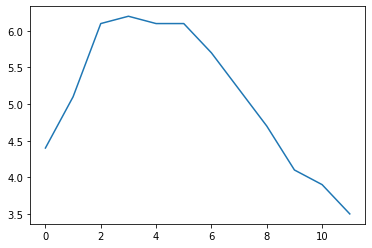

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

4. `groupby()`分组操作

In [85]:
# 创建一个用于实验的df
data = [[8.0, 8.0, 9.0, np.nan, 'Biking'],
       [10.0, 9.0, 10.0, np.nan, 'Dancing'],
       [4.0, 11.0, 5.0, np.nan, np.nan],
       [np.nan, np.nan, np.nan, np.nan, 'Dancing'],
       [9.0, 10.0, 11.0, np.nan, 'Biking']]
index = ['alice', 'bob', 'charles', 'colin', 'darwin']
cols = ['sep', 'oct', 'nov', 'dec', 'hobby']
final_grades = pd.DataFrame(data, index=index, columns=cols)
final_grades

grouped_grades = final_grades.groupby("hobby")
grouped_grades # * groupby之后的类型是DataFrameGroupBy，而非df

grouped_grades.mean() # ! 对DataFrameGroupBy执行统计操作, 注意NaN自动忽略

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN
